In [10]:
import re
import time
import timeit

import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import ml

In [11]:
cleaned_description = ml.get_and_clean_data()
cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))
tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))


In [21]:

def setRemove(data):
    # print(len(data))
    tokenized_description = data 
    stop_set = set(stopwords.words())
    sw_removed_description = tokenized_description.apply(lambda s: set(s) - stop_set)
    sw_removed_description = sw_removed_description.apply(lambda s: {word for word in s if len(word) > 2})

    return sw_removed_description
    
def listRemove(data):
    tokenized_description = data
    stop_list = (stopwords.words())
    sw_removed_description = tokenized_description.apply(lambda s: [word for word in s if word not in stop_list])
    sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word) > 2])

    return sw_removed_description

100
500
1000
1500
2000
2500
3000
   size       set        list
0   100  0.037320    2.799176
1   500  0.039048   14.843179
2  1000  0.069777   30.257403
3  1500  0.105363   47.521233
4  2000  0.133215   64.125776
5  2500  0.169885   85.514999
6  3000  0.213300  118.513162


<Axes: xlabel='size'>

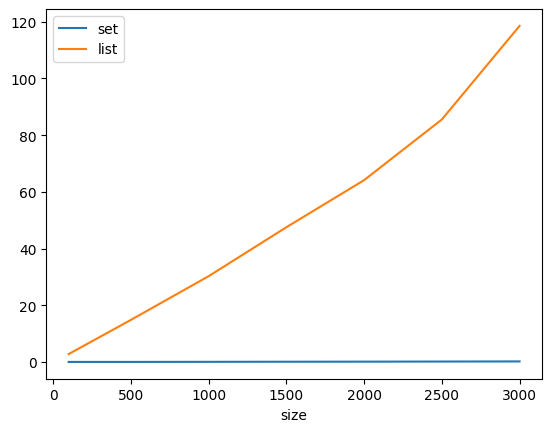

In [13]:
size_list = [100, 500,1000,1500,2000,2500,3000]
set_time = []
list_time = []
for size in size_list:
    set_time.append(timeit.timeit(lambda: setRemove(tokenized_description[:size]), number=1 ))
    list_time.append(timeit.timeit(lambda: listRemove(tokenized_description[:size]), number=1 ))



<Axes: xlabel='size', ylabel='time(s)'>

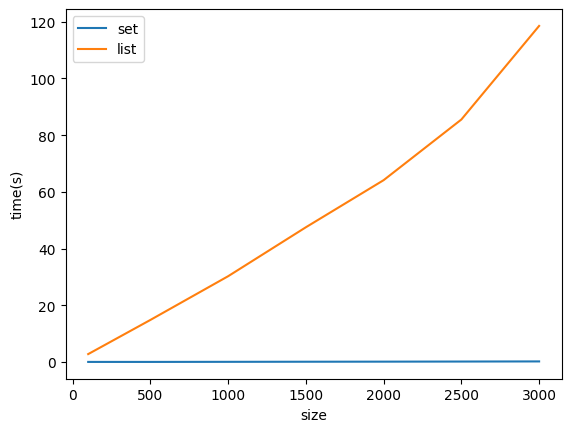

In [36]:
df = pd.DataFrame({'size': size_list, 'set': set_time , 'list': list_time })
# print(df)
df.plot(x='size', y=['set','list'], ylabel='time(s)')

<Axes: xlabel='size', ylabel='time(x)'>

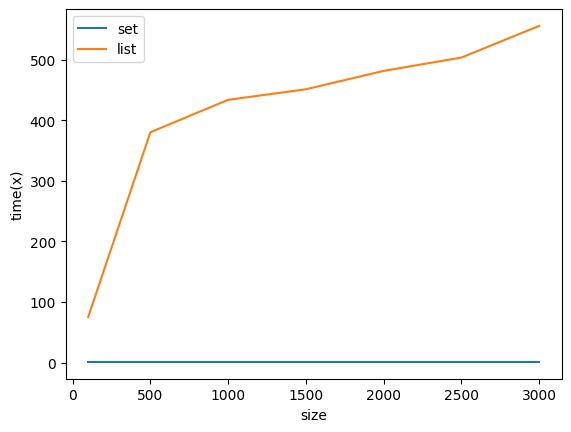

In [37]:
df_eff = pd.DataFrame({'size': size_list, 'set': [s/s for s in set_time], 'list': [s/set_time[i] for i, s in enumerate(list_time)]  })

df_eff.plot(x='size', y=['set','list'],ylabel='time(x)')



In [15]:
from multiprocessing.pool import Pool
import time

def say_hello(data): 
    print(data.head())

def process(pool_size, size, func):
    print(f"{pool_size=} {size=} {func=}")
    split = np.array_split(tokenized_description[:size], pool_size)
    with ThreadPool(pool_size) as p:
        p.map(func, split)

# def process(data,pool_size, function):
#     with Pool(pool_size) as p:
#         print(p)
#         p.map(function, data)

pool_size=1 size=10000 func=<function setRemove at 0x000001D9E1494CC0>
pool_size=2 size=10000 func=<function setRemove at 0x000001D9E1494CC0>
pool_size=4 size=10000 func=<function setRemove at 0x000001D9E1494CC0>
pool_size=8 size=10000 func=<function setRemove at 0x000001D9E1494CC0>
pool_size=16 size=10000 func=<function setRemove at 0x000001D9E1494CC0>


<Axes: xlabel='core'>

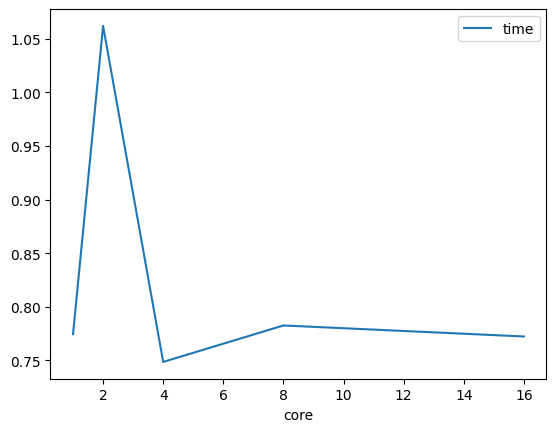

In [35]:
pool_sizes = [1,2,4,8,16]
output = []
for pool_size in pool_sizes:
    start = time.time()
    process(pool_size, 10000, setRemove)
    end = time.time()
    output.append(end - start)

df_core = pd.DataFrame({'core': pool_sizes, 'time': output })
df_core.plot(x='core', y='time')

